# Python Lab 5: Sentiment Identification


# Student Name: Josh Wacholz (2 Class solution)

# Table of Contents
1. Background
2. Goal
3. Source Data
4. Applied Methodology 
5. Assignment Guidelines
6. Conclusions and Recommendations

# 1. Background
A large multinational corporation is seeking to automatically identify the sentiment that their customer base talks about on social media. They would like to expand this capability into multiple languages. Many 3rd party tools exist for sentiment analysis, however, they need help with under-resourced languages.

# 2. Goal
Train a sentiment classifier (Positive, Negative, Neutral) on a corpus of the provided documents.
Here are the goals:

    a. Maximize Accuracy
    b. Accurately detect negative sentiment
    


# 3. Source Data
Dataset will be imported from the following link.

• Link: http://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set

# 4. Applied Methodology

There following are the approached methodology used to mined the dataset to meet the business goal.

    a.	Data Summary
    b.	Data Cleansing 
    c.	Data Wrangling
    d.	Data Validation
    e.	Data Visualization
    f.	Basic Text Mining 
    g.	Multiple Models Application
    
Note: Outline 4b to 4e will be applied to each variable.

In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#Step 1: Import Data from Source Link
data_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00458/Roman%20Urdu%20DataSet.csv'
Raw_Data = pd.read_csv(data_link)
Raw_Data.head(2)

,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Unnamed: 2
0,sahi bt h,Positive,NaN
1,"Kya bt hai,",Positive,NaN


In [ ]:
# Step 2: Add variable names becuase raw data was missing variable names.
Raw_Data = pd.read_csv(data_link , names=["Customer_Comment", "Sentiment_Classifier", "Flag"])
Raw_Data.head(2)

,Customer_Comment,Sentiment_Classifier,Flag
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN


# Apply Outline 4b to 4e to each field.

# Step 4b-4e (i): Flag Field

In [ ]:
Raw_Data.groupby("Flag")["Flag"].count()

Flag
------              1
-------             1
----------          1
----------------    1
9090                1
till here           2
Name: Flag, dtype: int64

In [ ]:
## Removed Flag field, looks like it is an extraneous variable as per the business objective.
Raw_Data_1 = Raw_Data[["Customer_Comment", "Sentiment_Classifier"]]
Raw_Data_1.head(2)

,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


# Step 4b-4e (ii): Sentiment_Classifier field

In [ ]:
#Examine Sentiment Classifier field
Raw_Data_1.groupby("Sentiment_Classifier")["Sentiment_Classifier"].count()

Sentiment_Classifier
Neative        1
Negative    5286
Neutral     8929
Positive    6013
Name: Sentiment_Classifier, dtype: int64

In [ ]:
#Clean 'Neative' value from above to 'Negative'
Raw_Data_1['Sentiment_Classifier'] = Raw_Data_1['Sentiment_Classifier'].replace('Neative', 'Negative')
Raw_Data_1.head(2)

,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


In [ ]:
# Validate Data
Raw_Data_1.groupby("Sentiment_Classifier")["Sentiment_Classifier"].count()

Sentiment_Classifier
Negative    5287
Neutral     8929
Positive    6013
Name: Sentiment_Classifier, dtype: int64

In [ ]:
# Change from 3 classes to 2 by assigning 1 to Negative values and 0 to positive and neutral values
Raw_Data_1["Sentiment_Classifier"] = Raw_Data_1["Sentiment_Classifier"].map({'Negative': 1, 'Positive': 0, 'Neutral':0})

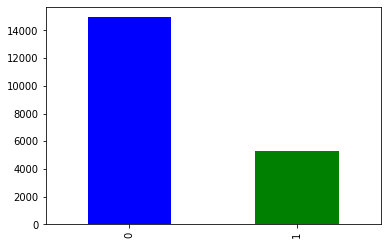

In [ ]:
# Visualize Data
import matplotlib.pyplot as plt
Raw_Data_1['Sentiment_Classifier'].value_counts().plot(kind='bar' ,color=['blue', 'green', 'red'])

# Step 4b-4e (ii): Customer_Comment field

In [ ]:
# Confirm if there is missing Data
print(Raw_Data_1.isnull().sum())

Customer_Comment        1
Sentiment_Classifier    0
dtype: int64


In [ ]:
##This shows that there is at least one within Customer_Comment field, so let remove them.
Raw_Data_2 = Raw_Data_1[pd.notnull(Raw_Data_1["Customer_Comment"])]
Raw_Data_2.head()

,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,0
1,sahi bt h,0
2,"Kya bt hai,",0
3,Wah je wah,0
4,Are wha kaya bat hai,0


In [ ]:
# Confirm if there is missing Data
print(Raw_Data_2.isnull().sum())

Customer_Comment        0
Sentiment_Classifier    0
dtype: int64


In [ ]:
# Convert data to lower case, trim leading and trailing white spaces.
# lower case
Raw_Data_2['Customer_Comment'] = Raw_Data_2['Customer_Comment'].str.lower()
Raw_Data_2.head(2)

,Customer_Comment,Sentiment_Classifier
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,0
1,sahi bt h,0


In [ ]:
#trim leading and trailing white spaces
Raw_Data_2 = Raw_Data_2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
Raw_Data_2.head(2)

,Customer_Comment,Sentiment_Classifier
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,0
1,sahi bt h,0


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
import tensorflow
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, Embedding, GlobalMaxPool1D, LSTM, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Convert Sentiment_Classifier values to integers
Raw_Data_2['Sentiment_Classifier'] = Raw_Data_2.Sentiment_Classifier.astype('category').cat.codes
Raw_Data_2.head(2)

,Customer_Comment,Sentiment_Classifier
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,0
1,sahi bt h,0


In [ ]:
# For a deep learning model we need to know what the input sequence length for our model should be
# Calculate the number of words in the Customer_Comment column and find the maximum value to be used for input sequence

Raw_Data_2['num_words'] = Raw_Data_2.Customer_Comment.apply(lambda x : len(x.split()))

Raw_Data_2['num_words'].max()

301

In [ ]:
# Set number of classes and target variable
num_class = len(np.unique(Raw_Data_2.Sentiment_Classifier.values))
y = Raw_Data_2['Sentiment_Classifier'].values
print(num_class)

2


In [ ]:
#Tokenize the input and pad
maxlen = 302
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(Raw_Data_2.Customer_Comment.values)
post_seq = tokenizer.texts_to_sequences(Raw_Data_2.Customer_Comment.values)
post_seq_padded = pad_sequences(post_seq, maxlen=maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

33269


In [ ]:
# Creating a train test split with 30% in testing data set
x_train, x_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.30)

In [ ]:
# Build Model
embedding_vector_length = 32 
model = Sequential() 
model.add(Embedding(vocab_size, 
                    embedding_vector_length, 
                    input_length = maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 302, 32)           1064608   
                                                                 
 bidirectional (Bidirectiona  (None, 302, 128)         49664     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,116,353
Trainable params: 1,116,353
Non-

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
222/222 [==============================] - 78s 336ms/step - loss: 0.5531 - accuracy: 0.7390 - val_loss: 0.4658 - val_accuracy: 0.7812
Epoch 2/5
222/222 [==============================] - 74s 333ms/step - loss: 0.3553 - accuracy: 0.8467 - val_loss: 0.4309 - val_accuracy: 0.8094
Epoch 3/5
222/222 [==============================] - 74s 334ms/step - loss: 0.1765 - accuracy: 0.9352 - val_loss: 0.5164 - val_accuracy: 0.7958
Epoch 4/5
222/222 [==============================] - 74s 333ms/step - loss: 0.0889 - accuracy: 0.9702 - val_loss: 0.6626 - val_accuracy: 0.7879
Epoch 5/5
222/222 [==============================] - 74s 334ms/step - loss: 0.0507 - accuracy: 0.9855 - val_loss: 0.8597 - val_accuracy: 0.7673


In [ ]:
loss, metric = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: %0.3f" % metric)

Test accuracy: 0.767


# Conclusions and Recommendations

Changing the number of classes from 3 to 2 in the dependent variable (Sentiment Classifier field) makes a big difference in the accuracy of this model. This is the model that the book uses on the IMDB dataset and it performs well here with ~77% accuracy "out of the box." 